In [1]:
import os
os.chdir('modules')
from train import train, score
from get_data import get_data
from model import LangID, LogisticRegression, ComplementNB, BernoulliNB
from get_gpt_reviews import get_gpt_reviews
import matplotlib.pyplot as plt
from random import shuffle
import numpy as np
Xt, Yt = get_data("dev")

TabError: inconsistent use of tabs and spaces in indentation (model.py, line 27)

In [17]:
for size in [50]:
    X_all, Y_all = get_data("gpt_" + str(size))
    assert len(get_data("n_" + str(size))) == size # Should be 2000 in the end
    new_len = len(X_all) - size
    print("Augmented 'x' size of original:", new_len/size, "for size", size)
    ps, scores = [], []
    for i in range(0, 101, 10):
        p = i/100
        data_size = int(size + p*new_len) # exclusive to avoid indexing [-1:]
        X, Y = X_all[-data_size:], Y_all[-data_size:]
        model = LogisticRegression(max_iter=100)
        model.fit(X, Y)
        acc = (model.predict(Xt) == np.array(Yt)).mean()
        scores.append(acc)
        ps.append(p)
    plt.plot(ps, scores)
    plt.show()

Augmented 'x' size of original: 3827.04 for size 50


D:\Users\Christoffer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\Christoffer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

KeyboardInterrupt: 

In [ ]:
from get_data import get_data

In [ ]:
ps, scores = [], []
for i in range(20, 101, 10):
    p = i/100
    data_size = int(base_len + p*new_len - 1) # exclusive to avoid indexing [-1:]
    data = list(zip(X_all[-data_size:], Y_all[-data_size:])) # Go from back, so we always get base data
    shuffle(data)
    X, Y = zip(*data)
    model, vocab = train(X, Y, epochs=15, embed_dim=100, lstm_dim=100, min_df=0., max_df=1., batch_size=64)
    
    scores.append(score(model, vocab, Xt, Yt))
    ps.append(p)
plt.plot(ps, scores)
plt.show()

In [ ]:
for min_df in [0]:
    ps, scores = [], []
    for i in range(0, 51, 10):
        p = i/100
        data_size = int(base_len + p*new_len - 1) # exclusive to avoid indexing [-1:]
        X = X_all[-data_size:] # Go from back, so we always get base data
        Y = Y_all[-data_size:]

        model, vocab = train(X, Y, epochs=20, embed_dim=100, lstm_dim=100, min_df=3, batch_size=512)
        scores.append(score(model, vocab, Xt, Yt))
        ps.append(p)
    plt.plot(ps, scores)
    plt.show()

In [ ]:
class OnehotTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def convert(self, sentence):# [[w1, w2, w3], [w1, w2, w3]]
        output = [0]*len(self.vocab)
        for word in sentence.split():
            word = word.lower()
            if word in self.vocab:
                output[self.vocab[word]] = 1
        return output

    def fit(self, X, y=None):
        vectorizer = TfidfVectorizer(min_df = 25)
        vectorizer.fit(X)
        self.vocab = vectorizer.vocabulary_
        return self
    
    def transform(self, X, y=None):
        X_ = [self.convert(row) for row in X]
        return X_

ps, scores = [], []
for i in range(0, 101, 5):
    p = i/100
    data_size = int(base_len + p*new_len - 1) # exclusive to avoid indexing [-1:]
    X = X_all[-data_size:] # Go from back, so we always get base data
    Y = Y_all[-data_size:]

    pipe = Pipeline([
        ('onehot', OnehotTransformer()),
        ('clf', LogisticRegression(max_iter=1000))
    ])
    pipe.fit(X, Y)
    
    scores.append(pipe.score(Xt, Yt))
    ps.append(p)
plt.plot(ps, scores)

In [15]:
size = 10
X_all, Y_all = get_data("gpt_" + str(size))
ps, scores = [], []
model = LogisticRegression(max_iter=100)
model.fit(X_all, Y_all)
probs = model.predict_proba(X_all)

# Assume the following:
# p = 0.1 (of being positive)
# l = 1 (positive)

# p - l -> abs(0.01 - 1) > 0.99 
# Will catch wrong predictions
poor_idxs = sorted([(abs(p - l), i) for p, l, i in zip(probs[:,1], Y, range(len(probs))) if abs(p - l) > 0.5], reverse=True)
print(poor_idxs[:5])

D:\Users\Christoffer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0.9998959636662803, 10676), (0.9998229194102297, 1205), (0.9996276726377116, 3259), (0.9995667596594093, 8418), (0.9995143593864504, 654)]


3862


D:\Users\Christoffer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\Christoffer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

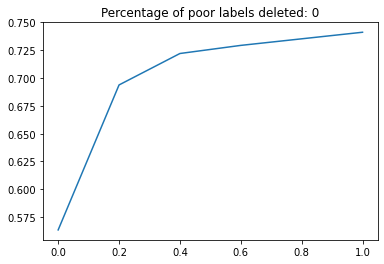

772


D:\Users\Christoffer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\Christoffer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

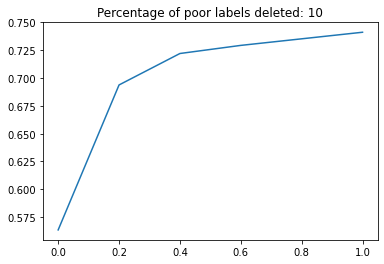

1544


D:\Users\Christoffer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KeyboardInterrupt: 

In [16]:
for del_p in range(0, 51, 10):
    del_size = int((del_p / 100)*len(poor_idxs))
    del_idxs = set(poor_idxs[:del_size])
    print('Deleting', len(del_idxs), 'constituting', len(del_idxs)/len(X_all), 'percent')
    
    X = [x for i, x in enumerate(X_all) if i not in del_idxs]
    Y = [y for i, y in enumerate(Y_all) if i not in del_idxs]
    
    new_len = len(X) - size
    ps, scores = [], []
    for i in range(0, 101, 20):
        p = i/100
        data_size = int(size + p*new_len) # exclusive to avoid indexing [-1:]
        x, y = X[-data_size:], Y[-data_size:]
        model = LogisticRegression(max_iter=100)
        model.fit(x, y)
        acc = (model.predict(Xt) == np.array(Yt)).mean()
        scores.append(acc)
        ps.append(p)
    plt.plot(ps, scores)
    plt.title('Percentage of poor labels deleted: ' + str(del_p))
    plt.show()

In [18]:
class OnehotTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def convert(self, sentence):# [[w1, w2, w3], [w1, w2, w3]]
        output = [0]*len(self.vocab)
        for word in sentence.split():
            word = word.lower()
            if word in self.vocab:
                output[self.vocab[word]] = 1
        return output

    def fit(self, X, y=None):
        vectorizer = TfidfVectorizer()
        vectorizer.fit(X)
        self.vocab = vectorizer.vocabulary_
        print('Fitted vocab')
        return self
    
    def transform(self, X, y=None):
        X_ = [self.convert(row) for row in X]
        return X_



NameError: name 'BaseEstimator' is not defined

In [2]:
size = 10
X, Y = get_data("gpt_" + str(size))
model = LogisticRegression(max_iter=100)
model.fit(X, Y)

NameError: name 'get_data' is not defined